#  Network based statistic (NBS)
Performing statistical tests on networks.

## The concept behind NBS

Network-based statistic is a non-parametric permutation test used to assess whether the connectomes of two populations are different.

#### What is a permutation test?
The basic idea of a permutation test is to compute a test-statistic from the data, then randomly shuffle the labels (e.g. sick versus patient), and repeat the procedure a large number of times to get the null distribution. If the first test-statistic significantly differs from the expected null distribution, we likely have a population difference.

[The original paper](https://www.sciencedirect.com/science/article/abs/pii/S1053811910008852)


__The steps of NBS are straight forward:__

1. For each edge of the network, perform a statistical test (two-sided t-test) for whether it is different between the two populations. This yields a single number for each edge.


2. Construct a pseudo-network where the above t-stats are used as the edges of the pseudo-network. The resulting graph can be thought of the "difference network" between the two populations.


2. Choose a threshold (usually you try multiple) and discard all the weights weaker than this threshold in the pseudo-network. This results in a fragmented network with components of variable size. Identify the largest connected component and write down its size (number of edges).


3. Identify the LARGEST connected component and write down its size (number of edges). This is your test-statistic. 


4. Randomly reassign the participants, and repeat step 1-3 *K* times (usually *K=1000*). Check for significance.


This image reviews the steps in a single iteration to compute the test statistic.
<img src="assets/nbs.png" alt="nbs steps" title="NBS steps" />

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [41]:
import numpy as np
import sys
import os

In [3]:
sys.executable

'C:\\Users\\Peder\\Anaconda3\\envs\\cbm101\\python.exe'

NBS is implemented in the Brain Connectivity Toolbox for Python `bctpy`. If you don't have it already installed, uncomment and run the cell below.

In [11]:
#!{sys.executable} -m pip install bctpy

  Using cached https://files.pythonhosted.org/packages/8e/56/e0505aeae481d5a5f780dccad3126fda1cab69532fdd6ca2a6280c309e63/bctpy-0.5.0.tar.gz
  Created wheel for bctpy: filename=bctpy-0.5.0-cp37-none-any.whl size=76645 sha256=6e7f0e964e94a6f5fa4e3073d2bf45a1b1927521782edcfb5dc39fa61d2ce701
  Stored in directory: C:\Users\Peder\AppData\Local\pip\Cache\wheels\22\83\31\bf64fd3cfc2034ca09ae97cc3621a583f155597260aa33dab3
Successfully built bctpy


In [4]:
!conda list bctpy

# packages in environment at C:\Users\Peder\Anaconda3\envs\cbm101:
#
# Name                    Version                   Build  Channel
bctpy                     0.5.0                    pypi_0    pypi


In [163]:
import bct
from bct import nbs

In [6]:
from numpy.linalg import norm
from sklearn.preprocessing import MinMaxScaler as scaler

In [7]:
all_subjects = np.random.rand(15,15,50) # N=50, nodes=15
group1 = all_subjects[:,:,:25]
group2 = all_subjects[:,:,25:]

In [164]:
from matplotlib import pyplot as plt

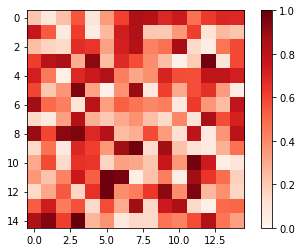

In [9]:
sub0 = group1[:,:,0] 
plt.imshow(sub0, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.colorbar()

Since we drew both groups out of the same population `all_subjects`, there should be no group difference between the two.

In [180]:
def do_nbs(g1, g2, kappa=0.8, plot=True):
    pval, adj, null = nbs.nbs_bct(g1, g2, kappa)
    if plot:
        plt.hist(null, bins=20); plt.show()
    return pval, adj, null

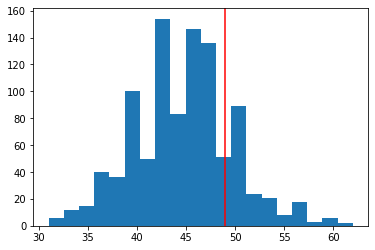

In [79]:
plt.hist(null, bins=20)
plt.axvline(49, c='red', )

**Conclusion:** the test statistic is well within the expected range under the null hypothesis, so we have no reason to assume a group difference. This is expected because we drew both groups from the same simulated population. Next we can use a real dataset from the Human Connectome Project (HCP1200) with some behavioural data to see if we have a difference based on certain traits.

### ABIDE

In [195]:
##### Download
#from nilearn import datasets
#yeo = datasets.fetch_atlas_yeo_2011()
#
#autism = datasets.fetch_abide_pcp(n_subjects=20, DX_GROUP=1)
#control = datasets.fetch_abide_pcp(n_subjects=20, DX_GROUP=2)
#
#from nilearn.input_data import NiftiLabelsMasker
#from nilearn.connectome import ConnectivityMeasure
#
#masker = NiftiLabelsMasker(labels_img = yeo['thick_17'], standardize=True,
#                           memory='nilearn_cache')
#measure = ConnectivityMeasure(kind='correlation')
#
#ts_au=[]
#for func in autism.func_preproc:
#    ts_au.append(masker.fit_transform(func))
#
#ts_hc=[]
#for func in control.func_preproc:
#    ts_hc.append(masker.fit_transform(func))
#
#    
#corr_au = measure.fit_transform(ts_au)
#corr_hc = measure.fit_transform(ts_hc)
#
#for i, m in enumerate(corr_au):
#    fn = f"abide_au{i+101}.txt"
#    np.savetxt(fn, m)
#    
#for i, m in enumerate(corr_hc):
#    fn = f"abide_hc{i+101}.txt"
#    np.savetxt(fn, m)


In [201]:
datapath = 'data/abide'

In [208]:
mats = [np.loadtxt(fn) for fn in os.scandir(path=datapath) if fn.name.startswith('abide')]
[fn.name for fn in os.scandir(datapath)]

['abide_au101.txt', 'abide_au102.txt', 'abide_au103.txt', 'abide_au104.txt', 'abide_au105.txt', 'abide_au106.txt', 'abide_au107.txt', 'abide_au108.txt', 'abide_au109.txt', 'abide_au110.txt', 'abide_au111.txt', 'abide_au112.txt', 'abide_au113.txt', 'abide_au114.txt', 'abide_au115.txt', 'abide_au116.txt', 'abide_au117.txt', 'abide_au118.txt', 'abide_au119.txt', 'abide_au120.txt', 'abide_hc101.txt', 'abide_hc102.txt', 'abide_hc103.txt', 'abide_hc104.txt', 'abide_hc105.txt', 'abide_hc106.txt', 'abide_hc107.txt', 'abide_hc108.txt', 'abide_hc109.txt', 'abide_hc110.txt', 'abide_hc111.txt', 'abide_hc112.txt', 'abide_hc113.txt', 'abide_hc114.txt', 'abide_hc115.txt', 'abide_hc116.txt', 'abide_hc117.txt', 'abide_hc118.txt', 'abide_hc119.txt', 'abide_hc120.txt']

In [205]:
X = np.array(mats)
y = np.array(['au']*20 + ['hc']*20)

In [209]:
y==['au']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [210]:
print(y.shape); print(X.shape)

(40,)
(40, 17, 17)


In [211]:
au = X[y=='au',:]
hc = X[y=='hc',:]

In [212]:
au.T.shape

(17, 17, 20)

In [213]:
kappa = 0.8 # just keep weights stronger than 0.8 
pval, adj, null = nbs.nbs_bct(au.T, hc.T, kappa)

max component size is 36
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 1.000
permutation 100 of 1000.  p-value so far is 0.861
permutation 200 of 1000.  p-value so far is 0.831
permutation 300 of 1000.  p-value so far is 0.811
permutation 400 of 1000.  p-value so far is 0.823
permutation 500 of 1000.  p-value so far is 0.820
permutation 600 of 1000.  p-value so far is 0.807
permutation 700 of 1000.  p-value so far is 0.805
permutation 800 of 1000.  p-value so far is 0.804
permutation 900 of 1000.  p-value so far is 0.804
permutation 999 of 1000.  p-value so far is 0.799


max component size is 110
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 0.000
permutation 100 of 1000.  p-value so far is 0.337
permutation 200 of 1000.  p-value so far is 0.363
permutation 300 of 1000.  p-value so far is 0.339
permutation 400 of 1000.  p-value so far is 0.364
permutation 500 of 1000.  p-value so far is 0.365
permutation 600 of 1000.  p-value so far is 0.359
permutation 700 of 1000.  p-value so far is 0.358
permutation 800 of 1000.  p-value so far is 0.357
permutation 900 of 1000.  p-value so far is 0.364
permutation 999 of 1000.  p-value so far is 0.359


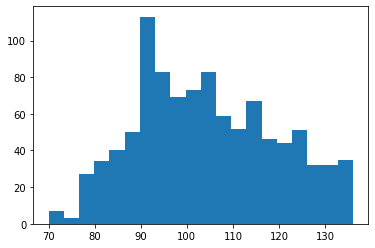

[0.359]


In [215]:
pval, adj, null = do_nbs(au.T, hc.T, kappa=0.3)
print(pval)

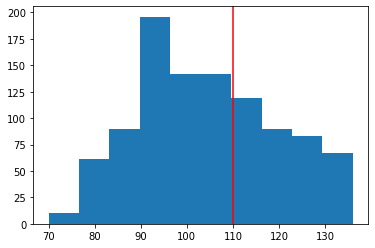

In [217]:
plt.hist(null)
plt.axvline(110, c='red')

We could find no significant difference in the connectome between those with ADHD and controls with this setup. This is not surprising, when we are using only 17 regions, a pretty rough parcellation.

## Pros and cons of NBS

**Pros**
* It let's you easily test hypotheses about group differences in networks (e.g. connectomes between sick and healthy).
* You can identify edges disturbed by disease

* There is no difficult math (non-parametric)
* It deals naturally with the graph structure
- it increases statistical power compared to other multiple testing

**Cons**
* It is hard to interpret what the difference actually is
* There is no obvious "right" value for the threshold (kappa)
* It is computationally heavy (like all permutation tests)


It works as follows: Choose a binary threshold kappa, and calculate the 
size of the largest connected component. This is your statistic, theta.

Now, randomly reassign the labels (i.e. sick vs healthy) to each graph,
and recalculate the LCC. Repeat N times (e.g.N=1000). This provides you
with a null distribution, which can be plotted in a histogram. 
Finally compare the test statistic theta to the distribution, to 
see if it deviates from the null distribution. 

If the difference reaches significance, we can be assured that 
there is a difference between the two experimental groups.

Tip: do the test at multiple threshold levels (kappa).
